# Different scales on the same axes

Demo of how to display two scales on the left and right y axis.

This example uses the Fahrenheit and Celsius scales.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def fahrenheit2celsius(temp):
    """
    Returns temperature in Celsius given Fahrenheit temperature.
    """
    return (5. / 9.) * (temp - 32)

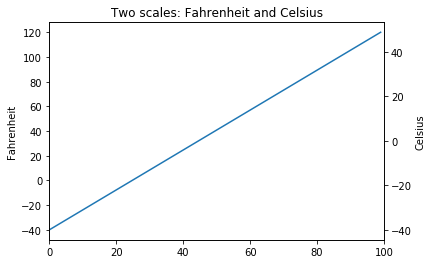

In [3]:
def make_plot():

    # Define a closure function to register as a callback
    def convert_ax_c_to_celsius(ax_f):
        """
        Update second axis according with first axis.
        """
        y1, y2 = ax_f.get_ylim()
        ax_c.set_ylim(fahrenheit2celsius(y1), fahrenheit2celsius(y2))
        ax_c.figure.canvas.draw()

    fig, ax_f = plt.subplots()
    ax_c = ax_f.twinx()

    # automatically update ylim of ax2 when ylim of ax1 changes.
    ax_f.callbacks.connect("ylim_changed", convert_ax_c_to_celsius)
    ax_f.plot(np.linspace(-40, 120, 100))
    ax_f.set_xlim(0, 100)

    ax_f.set_title('Two scales: Fahrenheit and Celsius')
    ax_f.set_ylabel('Fahrenheit')
    ax_c.set_ylabel('Celsius')

    plt.show()

make_plot()